In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("dataset.xlsx")

In [3]:
df

,Energy Density (Wh/L),Safety (SOC),Cost ($),Life (Hr),Efficiency (BE),Power(kWh)
0,0.000000,-8.300812,489.0,NaN,NaN,NaN
1,0.014693,-8.145514,525.0,0.0,NaN,NaN
2,0.029405,-8.145514,381.0,0.0,NaN,NaN
3,0.044130,-8.145514,311.0,NaN,NaN,NaN
4,0.058865,-8.223158,202.0,NaN,NaN,NaN
...,...,...,...,...,...,...
1048570,7.564692,NaN,NaN,NaN,NaN,NaN
1048571,7.564692,NaN,NaN,NaN,NaN,NaN
1048572,7.564692,NaN,NaN,NaN,NaN,NaN
1048573,7.564692,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Energy Density (Wh/L)  1048575 non-null  float64
 1   Safety (SOC)           19784 non-null    float64
 2   Cost ($)               27196 non-null    float64
 3   Life (Hr)              19658 non-null    float64
 4   Efficiency (BE)        19757 non-null    float64
 5   Power(kWh)             19757 non-null    float64
dtypes: float64(6)
memory usage: 48.0 MB


In [5]:
numeric_columns = ['Energy Density (Wh/L)', 'Safety (SOC)', 'Cost ($)', 'Life (Hr)', 'Efficiency (BE)', 'Power(kWh)']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [6]:
df.dropna(subset=['Life (Hr)', 'Efficiency (BE)', 'Power(kWh)'], inplace=True)

In [7]:
df = df[df['Energy Density (Wh/L)'] != 0]

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Energy Density (Wh/L)  19655 non-null  float64
 1   Safety (SOC)           19655 non-null  float64
 2   Cost ($)               19655 non-null  float64
 3   Life (Hr)              19655 non-null  float64
 4   Efficiency (BE)        19655 non-null  float64
 5   Power(kWh)             19655 non-null  float64
dtypes: float64(6)
memory usage: 921.5 KB


In [10]:
df

,Energy Density (Wh/L),Safety (SOC),Cost ($),Life (Hr),Efficiency (BE),Power(kWh)
0,0.399533,-7.990257,94.0,0.001391,117.083462,0.000005
1,0.414422,-7.990257,195.0,0.002782,58.094492,0.000010
2,0.429318,-7.990257,354.0,0.004173,38.558040,0.000015
3,0.444219,-7.990257,134.0,0.005563,28.815407,0.000021
4,0.459128,-7.958503,233.0,0.006954,22.979489,0.000026
...,...,...,...,...,...,...
19650,11.768819,-8.699798,437.0,-1.870348,73.493601,0.007463
19651,11.768819,-8.699798,544.0,-1.095794,73.507041,0.006650
19652,11.768819,-8.809319,627.0,-0.950302,73.524342,0.006288
19653,11.768819,-8.841124,113.0,-0.733791,73.541471,0.005648


In [11]:
df = df.drop(df.index[19654])

In [12]:
df

,Energy Density (Wh/L),Safety (SOC),Cost ($),Life (Hr),Efficiency (BE),Power(kWh)
0,0.399533,-7.990257,94.0,0.001391,117.083462,0.000005
1,0.414422,-7.990257,195.0,0.002782,58.094492,0.000010
2,0.429318,-7.990257,354.0,0.004173,38.558040,0.000015
3,0.444219,-7.990257,134.0,0.005563,28.815407,0.000021
4,0.459128,-7.958503,233.0,0.006954,22.979489,0.000026
...,...,...,...,...,...,...
19649,11.768819,-8.713908,192.0,-4.328623,73.486003,0.008118
19650,11.768819,-8.699798,437.0,-1.870348,73.493601,0.007463
19651,11.768819,-8.699798,544.0,-1.095794,73.507041,0.006650
19652,11.768819,-8.809319,627.0,-0.950302,73.524342,0.006288


### Linear Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [15]:
X = df[['Energy Density (Wh/L)', 'Safety (SOC)', 'Cost ($)', 'Life (Hr)', 'Efficiency (BE)']]
y = df['Power(kWh)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Value: {r2}')

# You can also print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 2.154204009035889e-06
R-squared Value: 0.6149089488094643
Coefficients: [ 1.29422182e-04 -9.87069031e-04  2.60519061e-06  2.67916834e-05
  1.41789872e-03]
Intercept: 0.005626467032007738


### Ensemble model

In [16]:
import pandas as pd
from sklearn.model_selection import  cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor

X = df[['Energy Density (Wh/L)', 'Safety (SOC)', 'Cost ($)', 'Life (Hr)', 'Efficiency (BE)']]
y = df['Power(kWh)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

#  individual models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create an ensemble of models using VotingRegressor
ensemble_model = VotingRegressor(estimators=[
    ('linear', linear_model),
    ('random_forest', rf_model)
])

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2 = r2_score(y_test, y_pred_ensemble)
print(f'Mean Squared Error (Ensemble): {mse_ensemble}')
print(f'R-squared Value: {r2}')

# # Perform cross-validation
# cv_scores = cross_val_score(ensemble_model, X, y, cv=5, scoring='neg_mean_squared_error')

# # Convert the scores to positive since scikit-learn returns neg_mean_squared_error
# cv_scores = -cv_scores

# # Calculate R-squared scores
# r2_scores = cross_val_score(ensemble_model, X, y, cv=5, scoring='r2')

# # Print the results
# print(f'Mean Squared Error (CV): {cv_scores.mean()}')
# print(f'R-squared Score (CV): {r2_scores.mean()}')

Mean Squared Error (Ensemble): 5.616085385449712e-07
R-squared Value: 0.8996054126913193


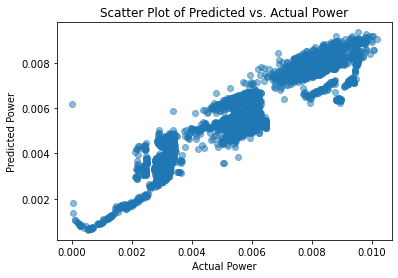

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
# Scatter plot of Predicted vs. Actual Power
plt.scatter(y_test, y_pred_ensemble, alpha=0.5)
plt.title('Scatter Plot of Predicted vs. Actual Power')
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.show()

In [18]:
new_data = pd.DataFrame({
    'Energy Density (Wh/L)': 0.521812,
    'Safety (SOC)': -2.192861,
    'Cost ($)': 567,
    'Life (Hr)': 0.0024281,
    'Efficiency (BE)': 55.21289
}, index = [0])
# new_data_scaled = scaler.transform(new_data)
# Make predictions
predicted_value = ensemble_model.predict(new_data)

print(f'Predicted(Power kWh)Value: {predicted_value[0]}')

Predicted(Power kWh)Value: 0.048204094366649984


### MultiOutput Regressor

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have a DataFrame named 'df' with columns: 'Energy Density', 'Safety', 'Cost', 'Life', 'Efficiency', 'Power'

# Define features and target variables
X = df[['Energy Density (Wh/L)', 'Cost ($)', 'Life (Hr)', 'Efficiency (BE)']]
y = df[['Power(kWh)', 'Safety (SOC)']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Individual models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Multi-output regression model
multioutput_model = MultiOutputRegressor(estimator=VotingRegressor(estimators=[
    ('linear', linear_model),
    ('random_forest', rf_model),
    ('gradient_boosting', gb_model)
]))

# Train the multi-output model
multioutput_model.fit(X_train_scaled, y_train)

# Make predictions on the test set

y_pred_multioutput = multioutput_model.predict(X_test_scaled)

# Evaluate the multi-output model
mse_multioutput = mean_squared_error(y_test, y_pred_multioutput, multioutput='raw_values')
r2_multioutput = r2_score(y_test, y_pred_multioutput, multioutput='raw_values')

print(f'Mean Squared Error (Multi-Output): {mse_multioutput}')
print(f'R-squared Value (Multi-Output): {r2_multioutput}')


Mean Squared Error (Multi-Output): [1.02304908e-06 1.94574552e-01]
R-squared Value (Multi-Output): [0.81711711 0.6735747 ]


In [20]:

# Input values for prediction
input_values = [[0.521812, -2.192861, 0.0024281, 55.21289]]

# Scale the input values using the same scaler
scaled_input_values = scaler.transform(input_values)

# Make predictions for 'Power' and 'Safety'
predictions = multioutput_model.predict(scaled_input_values)

# The 'predictions' variable now contains the predicted values for 'Power' and 'Safety'
predicted_power = predictions[0, 0]
predicted_safety = predictions[0, 1]

print(f'Predicted Power: {predicted_power}')
print(f'Predicted Safety: {predicted_safety}')


#    'Energy Density': 0.521812,
#     'Safety': -2.192861,
#     'Cost': 567,
#     'Life': 0.0024281,
#     'Efficiency': 55.21289

Predicted Power: 0.0033328039898676575
Predicted Safety: -7.381658679332311
